In [1]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

In [4]:
train_df.shape

(550068, 12)

In [5]:
test_df.shape

(233599, 11)

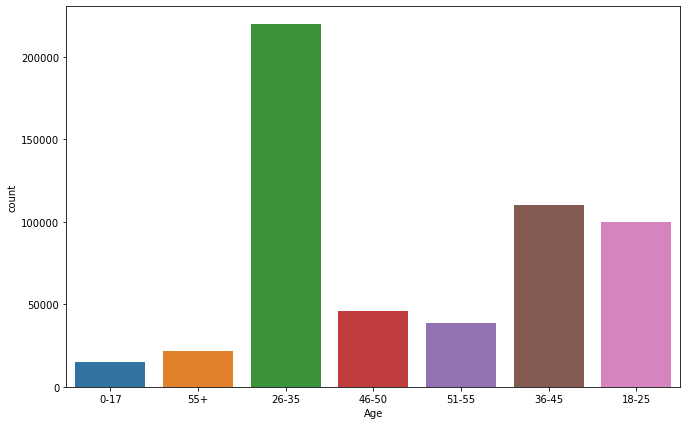

In [6]:
plt.figure(figsize=(11,7))
sns.countplot(train_df['Age'])

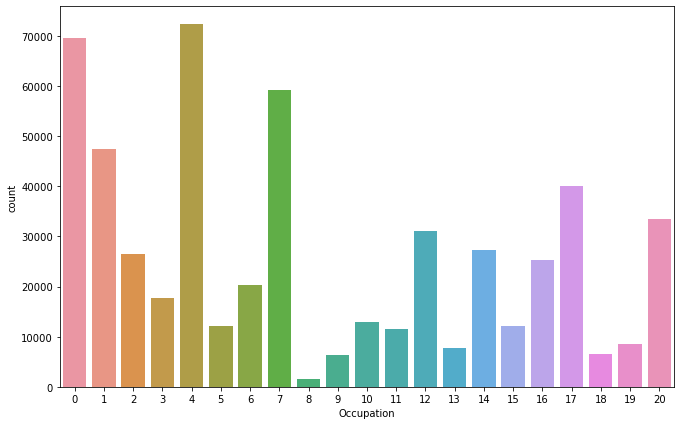

In [7]:
plt.figure(figsize=(11,7))
sns.countplot(train_df['Occupation'])

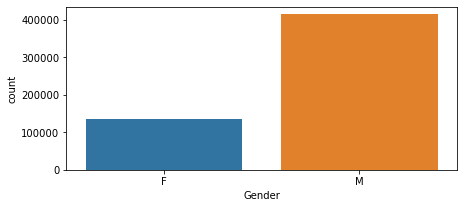

In [8]:
plt.figure(figsize=(7,3))
sns.countplot(train_df['Gender'])

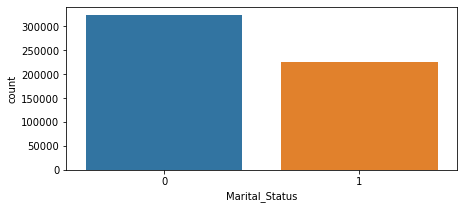

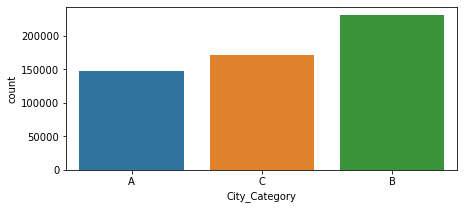

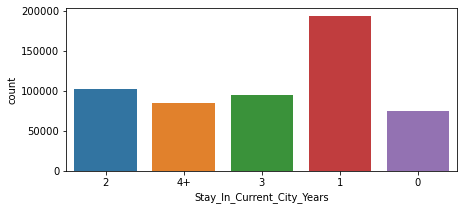

In [9]:
plt.figure(figsize=(7,3))
sns.countplot(train_df['Marital_Status'])
plt.figure(figsize=(7,3))
sns.countplot(train_df['City_Category'])
plt.figure(figsize=(7,3))
sns.countplot(train_df['Stay_In_Current_City_Years'])

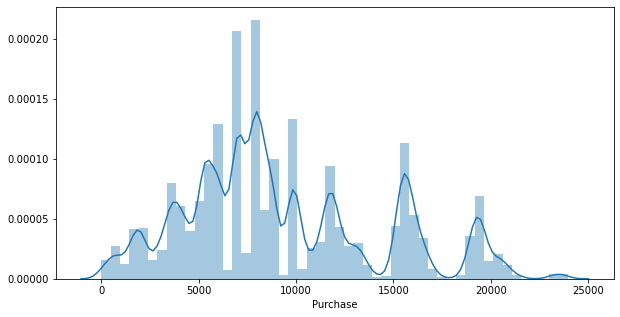

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(train_df['Purchase'])

In [11]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
train_df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
train_new = train_df
test_new = test_df

In [14]:
train_new['Product_Category_2'] = train_new['Product_Category_2'].replace(to_replace=np.nan,value=0)
train_new['Product_Category_3'] = train_new['Product_Category_3'].replace(to_replace=np.nan,value=0)
train_new['Stay_In_Current_City_Years'] = train_new['Stay_In_Current_City_Years'].replace(to_replace='4+',value=5)
train_new['Age'] = train_new['Age'].replace(to_replace='0-17',value=1)
train_new['Age'] = train_new['Age'].replace(to_replace='18-25',value=2)
train_new['Age'] = train_new['Age'].replace(to_replace='26-35',value=3)
train_new['Age'] = train_new['Age'].replace(to_replace='36-45',value=4)
train_new['Age'] = train_new['Age'].replace(to_replace='46-50',value=5)
train_new['Age'] = train_new['Age'].replace(to_replace='51-55',value=6)
train_new['Age'] = train_new['Age'].replace(to_replace='55+',value=7)


test_new['Product_Category_2'] = test_new['Product_Category_2'].replace(to_replace=np.nan,value=0)
test_new['Product_Category_3'] = test_new['Product_Category_3'].replace(to_replace=np.nan,value=0)
test_new['Stay_In_Current_City_Years'] = test_new['Stay_In_Current_City_Years'].replace(to_replace='4+',value=5)
test_new['Age'] = test_new['Age'].replace(to_replace='0-17',value=1)
test_new['Age'] = test_new['Age'].replace(to_replace='18-25',value=2)
test_new['Age'] = test_new['Age'].replace(to_replace='26-35',value=3)
test_new['Age'] = test_new['Age'].replace(to_replace='36-45',value=4)
test_new['Age'] = test_new['Age'].replace(to_replace='46-50',value=5)
test_new['Age'] = test_new['Age'].replace(to_replace='51-55',value=6)
test_new['Age'] = test_new['Age'].replace(to_replace='55+',value=7)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le_gender = LabelEncoder()
le_city = LabelEncoder()

train_new[['Gender']] = le_gender.fit_transform(train_new[['Gender']])
train_new[['City_Category']] = le_city.fit_transform(train_new[['City_Category']])

test_new[['Gender']] = le_gender.transform(test_new[['Gender']])
test_new[['City_Category']] = le_city.transform(test_new[['City_Category']])

C:\Users\danis\anaconda3\envs\ai42\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [17]:
train_new = train_new.drop(columns=['User_ID','Product_ID'])

In [18]:
train_new.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,0.0,0.0,8370
1,0,1,10,0,2,0,1,6.0,14.0,15200
2,0,1,10,0,2,0,12,0.0,0.0,1422
3,0,1,10,0,2,0,12,14.0,0.0,1057
4,1,7,16,2,5,0,8,0.0,0.0,7969


In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from keras.utils import to_categorical

In [20]:
train_new.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,0.0,0.0,8370
1,0,1,10,0,2,0,1,6.0,14.0,15200
2,0,1,10,0,2,0,12,0.0,0.0,1422
3,0,1,10,0,2,0,12,14.0,0.0,1057
4,1,7,16,2,5,0,8,0.0,0.0,7969


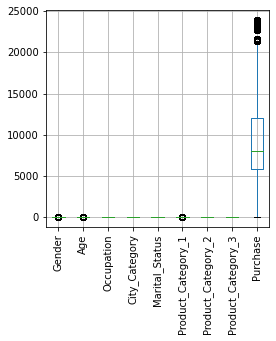

In [21]:
train_new.boxplot(rot=90,figsize=(4,4))

In [22]:
'''q1 = train_new.quantile(0.25)
q3 = train_new.quantile(0.75)

iqr = q3-q1

train_new = train_new[~((train_new<q1-1.5*iqr)|(train_new>q3+1.5*iqr)).any(axis=1)]'''

In [22]:
x = train_new.drop('Purchase',axis=1)
y = train_new['Purchase'].values

In [23]:
x_val = test_new.drop(columns=['User_ID','Product_ID'])

In [24]:
x.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,1,10,0,2,0,3,0.0,0.0
1,0,1,10,0,2,0,1,6.0,14.0
2,0,1,10,0,2,0,12,0.0,0.0
3,0,1,10,0,2,0,12,14.0,0.0
4,1,7,16,2,5,0,8,0.0,0.0


In [25]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse=True)

ohe_cols = ['Gender','Occupation','City_Category','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']

x = ohe.fit_transform(x[ohe_cols])
x_val = ohe.transform(x_val[ohe_cols])

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
sc = MinMaxScaler()

y = sc.fit_transform(y.reshape(-1,1))

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [30]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from livelossplot import PlotLossesKeras
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [31]:
def create_model():
    model = Sequential()
    
    model.add(Dense(512,input_shape=(x_train.shape[1],),activation='relu'))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='linear'))
    
    return model

model = create_model()
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               42496     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 190,337
Trainable params: 190,337
Non-trainable params: 0
________________________________________________

In [32]:
callback = [ModelCheckpoint('tmp_weights/epoch_{epoch:02d}',
                           save_weights_only=True,
                           save_best_only=False,
                           monitor='val_loss'),
           EarlyStopping(patience=5,
                        monitor='val_accuracy'),
           PlotLossesKeras()]

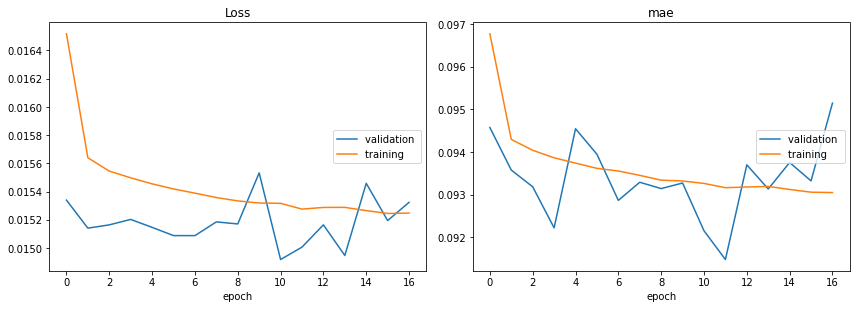

Loss
	validation       	 (min:    0.015, max:    0.016, cur:    0.015)
	training         	 (min:    0.015, max:    0.017, cur:    0.015)
mae
	validation       	 (min:    0.091, max:    0.095, cur:    0.095)
	training         	 (min:    0.093, max:    0.097, cur:    0.093)
Epoch 18/20
119296/440054 [=======>......................] - ETA: 54s - loss: 0.0152 - mae: 0.0930

KeyboardInterrupt: 

In [33]:
h = model.fit(x_train,y_train,
             validation_data=(x_test,y_test),
             epochs=20,
             batch_size=32,
             callbacks=callback)

In [34]:
y_pred = model.predict(x_val)
y_pred = sc.inverse_transform(y_pred)
y_pred = np.squeeze(y_pred)

In [35]:
submission = pd.DataFrame({'Purchase': y_pred,'User_ID':test_df['User_ID'],'Product_ID':test_df['Product_ID']})

In [36]:
submission.to_csv('submission.csv',index=False)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

In [44]:
reg = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [56]:
y_pred3 = reg.predict(x_val)
y_pred3 = sc.inverse_transform(y_pred3.reshape(-1,1))
y_pred3 = np.squeeze(y_pred3)

In [58]:
submission3 = pd.DataFrame({'Purchase': y_pred3,'User_ID':test_df['User_ID'],'Product_ID':test_df['Product_ID']})
submission3.to_csv("submission3.csv",index=False)

In [39]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred2 = lr.predict(x_val)
y_pred2 = sc.inverse_transform(y_pred2)
y_pred2 = np.squeeze(y_pred2)

In [41]:
submission2 = pd.DataFrame({'Purchase': y_pred2,'User_ID':test_df['User_ID'],'Product_ID':test_df['Product_ID']})
submission2.to_csv("submission2.csv",index=False)

In [ ]:
''''model = model.save('final_model.h5')

model_json = model.to_json()

#with open('final_model.json','w') as file:
 #   file.write(model_json)''''